<a href="https://colab.research.google.com/github/Bodruzzaman-Khan/Simulation-using-ML-DL/blob/main/Simulating_fluid_flow_around_an_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating fluid flow around an object

**Author:** Bodruzzaman Khan

**Email:** bodruzzamankhan.sau@gmail.com

---


**Import Necessary Packages**

In [ ]:
%pip install --quiet phiflow
from phi.jax.flow import *
from tqdm.notebook import trange

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.9/166.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


*   The '--quiet' flag in '%pip install --quiet phiflow' suppresses output messages during the installation process. This can make our notebook cleaner by reducing clutter, especially if we’re installing multiple packages or running it in an environment where you want minimal output.
*   Imports the trange function from tqdm.notebook to display a progress bar for loops in Jupyter notebooks.


**Define the obstacle's (rotating object's) initial orientation.**

In [10]:
# Define the obstacle as a Box
# Check the coordinates to ensure the box is placed where you expect
bar = Obstacle(Box(lower=vec(x=30, y=25), upper=vec(x=60, y=60)), angular_velocity=0.09)

**Define the initial velocity field.**

In [11]:
# Define the staggered grid
# Ensure the grid encompasses the obstacle
v0 = StaggeredGrid(0, ZERO_GRADIENT, Box(lower=vec(x=0, y=0), upper=vec(x=100, y=100)), x=100, y=100)

**Plot the grid with the obstacle**

<Figure size 1200x500 with 1 Axes>

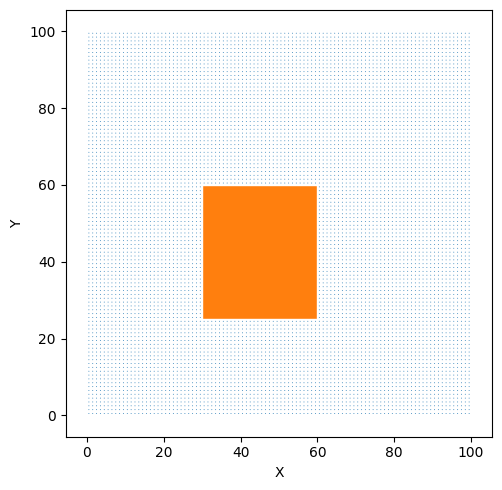

In [12]:
plot(v0, bar.geometry, overlay='args')

**Define the simulation steps:**

*   Fluid advection
*   Object rotation
*   Incompressibility

In [13]:
@jit_compile
def step(v, p, bar: Obstacle, dt=1.):
    bar = bar.rotated(bar.angular_velocity * dt)
    v = advect.mac_cormack(v, v, dt)
    v, p = fluid.make_incompressible(v, bar, Solve(x0=p))
    return v, p, bar

**Run Simulation Iterations with Progress Tracking**

In [14]:
v_trj, p_trj, bar_trj = iterate(step, batch(time=500), v0, None, bar, range=trange)

  0%|          | 0/500 [00:00<?, ?it/s]

**Animate the x and y components of the velocity field**

In [ ]:
from phi.flow import plot

# Custom plot with additional parameters
plot(
    dict(**v_trj.vector),                  # Field data to plot
    bar_trj.geometry,                      # Geometry data
    overlay='args',                    # Customize overlay to visualize velocity
    animate='time',                        # Animate over time
    title='Velocity Field and Obstacles',  # Title for the plot
)

or

In [15]:

# Assuming v_trj.vector is a dictionary with 'x' and 'y' as keys for the velocity components
x_velocity = v_trj.vector['x']
y_velocity = v_trj.vector['y']

# Creating a combined plot with subplots for x and y velocity components
plot(
    {'x-velocity': x_velocity, 'y-velocity': y_velocity},
    bar_trj.geometry,
    overlay='args',
    animate='time'
)
